In [96]:
## load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from scipy.stats import poisson, ttest_ind

In [2]:
## load data on ghg data
biking_2013 = pd.read_csv("201306-citibike-tripdata.csv")
biking_2013 = biking_2013.rename(columns={"birth year":"birthyear"})
biking_2013.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender
0,695,2013-06-01 00:00:01,2013-06-01 00:11:36,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,19678,Subscriber,1983.0,1
1,693,2013-06-01 00:00:08,2013-06-01 00:11:41,444,Broadway & W 24 St,40.742354,-73.989151,434.0,9 Ave & W 18 St,40.743174,-74.003664,16649,Subscriber,1984.0,1
2,2059,2013-06-01 00:00:44,2013-06-01 00:35:03,406,Hicks St & Montague St,40.695128,-73.995951,406.0,Hicks St & Montague St,40.695128,-73.995951,19599,Customer,NaN,0
3,123,2013-06-01 00:01:04,2013-06-01 00:03:07,475,E 15 St & Irving Pl,40.735243,-73.987586,262.0,Washington Park,40.691782,-73.973730,16352,Subscriber,1960.0,1
4,1521,2013-06-01 00:01:22,2013-06-01 00:26:43,2008,Little West St & 1 Pl,40.705693,-74.016777,310.0,State St & Smith St,40.689269,-73.989129,15567,Subscriber,1983.0,1


In [3]:
biking_2016 = pd.read_csv("201606-citibike-tripdata.csv")
biking_2016 = biking_2016.rename(columns={"birth year":"birthyear"})
biking_2016.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender
0,1470,6/1/2016 00:00:18,6/1/2016 00:24:48,380,W 4 St & 7 Ave S,40.734011,-74.002939,3236,W 42 St & Dyer Ave,40.758985,-73.993800,19859,Subscriber,1972.0,1
1,229,6/1/2016 00:00:20,6/1/2016 00:04:09,3092,Berry St & N 8 St,40.719009,-73.958525,3103,N 11 St & Wythe Ave,40.721533,-73.957824,16233,Subscriber,1967.0,1
2,344,6/1/2016 00:00:21,6/1/2016 00:06:06,449,W 52 St & 9 Ave,40.764618,-73.987895,469,Broadway & W 53 St,40.763441,-73.982681,22397,Subscriber,1989.0,1
3,1120,6/1/2016 00:00:28,6/1/2016 00:19:09,522,E 51 St & Lexington Ave,40.757148,-73.972078,401,Allen St & Rivington St,40.720196,-73.989978,16231,Subscriber,1991.0,1
4,229,6/1/2016 00:00:53,6/1/2016 00:04:42,335,Washington Pl & Broadway,40.729039,-73.994046,285,Broadway & E 14 St,40.734546,-73.990741,15400,Subscriber,1989.0,1


In [4]:
routes = pd.read_csv("bicycle-routes-1.csv")
routes.head()

,fromstreet,street,boro,the_geom,tostreet,onoffst,allclasses,instdate,moddate,comments,bikedir,lanecount,ft_facilit,tf_facilit,SegmentID,Shape_Leng
0,W 16 ST,9 AV,1,MULTILINESTRING ((-74.00039850899998 40.747767...,W 31 ST,ON,I,09/25/2008 12:00:00 AM +0000,09/25/2008 12:00:00 AM +0000,NaN,L,1,NaN,Protected Path,33547.0,0.000782
1,DEAN ST,3 AV,3,MULTILINESTRING ((-73.98747868599997 40.675707...,15 ST,ON,II,07/01/1980 12:00:00 AM +0000,07/01/1980 12:00:00 AM +0000,NaN,R,1,Standard,NaN,22630.0,0.000820
2,TILLARY ST,ADAMS ST,3,MULTILINESTRING ((-73.98850195799997 40.697357...,SANDS ST,ON,III,06/01/2006 12:00:00 AM +0000,07/01/2017 12:00:00 AM +0000,downgrade to shared,L,1,NaN,Sharrows,299123.0,0.001014
3,5 AV,W 39 ST,1,MULTILINESTRING ((-73.98227490399995 40.751577...,8 AV,ON,III,09/12/2012 12:00:00 AM +0000,09/12/2012 12:00:00 AM +0000,NaN,R,1,Sharrows,NaN,34170.0,0.003488
4,FLUSHING AV,THROOP AV,3,MULTILINESTRING ((-73.94149491699994 40.685764...,FULTON ST,ON,II,06/01/2003 12:00:00 AM +0000,06/01/2003 12:00:00 AM +0000,NaN,L,1,NaN,Standard,43043.0,0.000748


In [5]:
len(biking_2016)

1460318

In [6]:
len(biking_2013)

577703

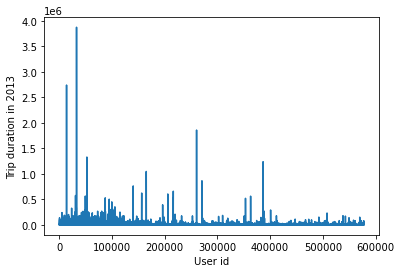

In [7]:
plt.plot(biking_2013["tripduration"])
plt.xlabel("User id")
plt.ylabel("Trip duration in 2013")
plt.show()

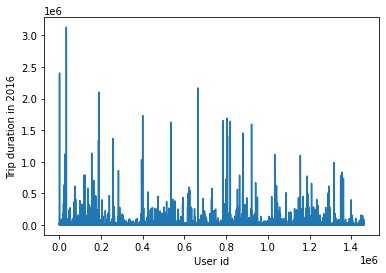

In [8]:
plt.plot(biking_2016["tripduration"])
plt.xlabel("User id")
plt.ylabel("Trip duration in 2016")
plt.show()

In [9]:
num_subscribers_2013 = biking_2013.query("usertype == 'Subscriber'")
len(num_subscribers_2013)

337384

In [10]:
num_subscribers_2016 = biking_2016.query("usertype == 'Subscriber'")
len(num_subscribers_2016)

1303486

In [11]:
percent_subscribers_2013 = len(num_subscribers_2013) / len(biking_2013)
print("The percent of subscribers in 2013 is " + "{:.2%}".format(percent_subscribers_2013))

The percent of subscribers in 2013 is 58.40%


In [12]:
percent_subscribers_2016 = len(num_subscribers_2016) / len(biking_2016)
print("The percent of subscribers in 2016 is " + "{:.2%}".format(percent_subscribers_2016))

The percent of subscribers in 2016 is 89.26%


In [13]:
##Percent change in subscribers from 2013 to 2019
percent_change = (len(num_subscribers_2016) - len(num_subscribers_2013) ) / len(num_subscribers_2013)
print("The percent of change of subscribers from 2013 to 2016 is " + "{:.2%}".format(percent_change))

The percent of change of subscribers from 2013 to 2016 is 286.35%


In [28]:
biking_2013_subset = biking_2013.query('birthyear > 1920 & gender > 0')
biking_2013_subset = biking_2013_subset.sample(n=1000, random_state=1)
biking_2013_subset = biking_2013_subset.reset_index(level=0)
biking_2013_subset.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender
0,290985,1390,2013-06-20 16:33:28,2013-06-20 16:56:38,427,Bus Slip & State St,40.701907,-74.013942,545.0,E 23 St & 1 Ave,40.736502,-73.978095,14889,Subscriber,1972.0,1
1,302081,684,2013-06-20 21:33:25,2013-06-20 21:44:49,312,Allen St & Stanton St,40.722055,-73.989111,316.0,Fulton St & William St,40.709560,-74.006536,18471,Subscriber,1971.0,1
2,479714,508,2013-06-27 12:03:20,2013-06-27 12:11:48,523,W 38 St & 8 Ave,40.754666,-73.991382,489.0,10 Ave & W 28 St,40.750664,-74.001768,17734,Subscriber,1979.0,1
3,511927,1927,2013-06-28 16:54:19,2013-06-28 17:26:26,404,9 Ave & W 14 St,40.740583,-74.005509,488.0,W 39 St & 9 Ave,40.756458,-73.993722,19763,Subscriber,1989.0,2
4,469457,513,2013-06-26 22:14:48,2013-06-26 22:23:21,237,E 11 St & 2 Ave,40.730473,-73.986724,402.0,Broadway & E 22 St,40.740343,-73.989551,15285,Subscriber,1980.0,1


In [29]:
len(biking_2013_subset)

1000

In [26]:
biking_2016_subset = biking_2016.query('birthyear > 1920 & gender > 0')
biking_2016_subset = biking_2016_subset.sample(n=1000, random_state=1)
biking_2016_subset = biking_2016_subset.reset_index(level=0)
biking_2016_subset.head()

,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender
0,1242409,641,6/26/2016 18:19:17,6/26/2016 18:29:59,498,Broadway & W 32 St,40.748549,-73.988084,528,2 Ave & E 31 St,40.742909,-73.977061,25678,Subscriber,1993.0,1
1,196945,1192,6/5/2016 13:50:53,6/5/2016 14:10:45,236,St Marks Pl & 2 Ave,40.728419,-73.987140,385,E 55 St & 2 Ave,40.757973,-73.966033,15684,Subscriber,1955.0,1
2,330639,1302,6/8/2016 10:12:38,6/8/2016 10:34:21,3168,Central Park West & W 85 St,40.784727,-73.969617,479,9 Ave & W 45 St,40.760193,-73.991255,18368,Subscriber,1949.0,1
3,935045,236,6/20/2016 18:04:47,6/20/2016 18:08:44,353,S Portland Ave & Hanson Pl,40.685396,-73.974315,384,Fulton St & Washington Ave,40.683048,-73.964915,22943,Subscriber,1988.0,1
4,1216298,639,6/26/2016 10:22:04,6/26/2016 10:32:43,3125,45 Rd & 11 St,40.747086,-73.949772,3108,Nassau Ave & Russell St,40.725570,-73.944340,25645,Subscriber,1983.0,1


In [27]:
len(biking_2016_subset)

1000

In [18]:
routes_subset = routes.sample(n=1000, random_state=1)
routes_subset = routes_subset.reset_index(level=0)
routes_subset.head()

,index,fromstreet,street,boro,the_geom,tostreet,onoffst,allclasses,instdate,moddate,comments,bikedir,lanecount,ft_facilit,tf_facilit,SegmentID,Shape_Leng
0,7356,BEACH 193 ST,STATE RD,4,MULTILINESTRING ((-73.90225363399998 40.562189...,BEACH 169 ST,ON,II,05/01/1997 12:00:00 AM +0000,05/01/1997 12:00:00 AM +0000,NaN,R,1,Curbside,NaN,149081.0,0.000068
1,9269,32 AVE,101 ST,4,MULTILINESTRING ((-73.86824140499994 40.761723...,ASTORIA BLVD,ON,II,10/14/2016 12:00:00 AM +0000,10/14/2016 12:00:00 AM +0000,NaN,L,1,NaN,Standard,177415.0,0.000619
2,12243,E 125 ST,2 AV,1,MULTILINESTRING ((-73.93411419099994 40.802046...,E 104 ST,ON,I,10/26/2012 12:00:00 AM +0000,10/26/2012 12:00:00 AM +0000,NaN,L,1,NaN,Protected Path,110979.0,0.000060
3,9482,SUNNYSIDE AV,VERMONT ST,3,MULTILINESTRING ((-73.89597729299999 40.680112...,COZINE AV,ON,III,10/01/2009 12:00:00 AM +0000,10/01/2009 12:00:00 AM +0000,NaN,L,1,NaN,Sharrows,47593.0,0.001175
4,13586,GARRISON AVE,HUNTS PT AV,2,MULTILINESTRING ((-73.88838357299994 40.817305...,SPOFFORD AVE,ON,II,11/01/2011 12:00:00 AM +0000,11/01/2011 12:00:00 AM +0000,NaN,2,2,Standard,Standard,9002144.0,0.000059


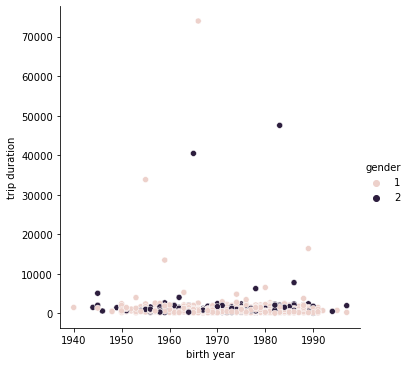

In [30]:
sns.relplot(x="birthyear", y="tripduration", hue="gender", data=biking_2013_subset)
plt.xlabel("birth year")
plt.ylabel("trip duration")
plt.show()

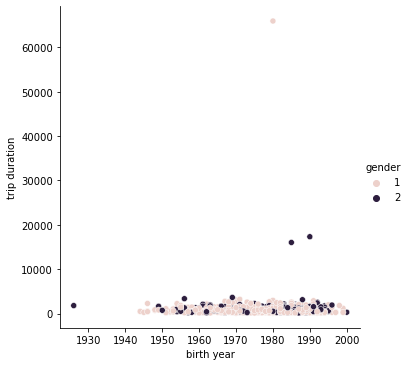

In [31]:
sns.relplot(x="birthyear", y="tripduration", hue="gender", data=biking_2016_subset)
plt.xlabel("birth year")
plt.ylabel("trip duration")
plt.show()

In [32]:
## Edit the longitude and latitude to two decimal places
for x in range(len(biking_2016_subset)):
    biking_2016_subset["start station latitude"][x] = round(biking_2016_subset["start station latitude"][x],2)
    biking_2016_subset["start station longitude"][x] = round(biking_2016_subset["start station longitude"][x],2)
biking_2016_subset.head()

/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender
0,1242409,641,6/26/2016 18:19:17,6/26/2016 18:29:59,498,Broadway & W 32 St,40.75,-73.99,528,2 Ave & E 31 St,40.742909,-73.977061,25678,Subscriber,1993.0,1
1,196945,1192,6/5/2016 13:50:53,6/5/2016 14:10:45,236,St Marks Pl & 2 Ave,40.73,-73.99,385,E 55 St & 2 Ave,40.757973,-73.966033,15684,Subscriber,1955.0,1
2,330639,1302,6/8/2016 10:12:38,6/8/2016 10:34:21,3168,Central Park West & W 85 St,40.78,-73.97,479,9 Ave & W 45 St,40.760193,-73.991255,18368,Subscriber,1949.0,1
3,935045,236,6/20/2016 18:04:47,6/20/2016 18:08:44,353,S Portland Ave & Hanson Pl,40.69,-73.97,384,Fulton St & Washington Ave,40.683048,-73.964915,22943,Subscriber,1988.0,1
4,1216298,639,6/26/2016 10:22:04,6/26/2016 10:32:43,3125,45 Rd & 11 St,40.75,-73.95,3108,Nassau Ave & Russell St,40.725570,-73.944340,25645,Subscriber,1983.0,1


In [33]:
for x in range(len(biking_2013_subset)):
    biking_2013_subset["start station latitude"][x] = round(biking_2013_subset["start station latitude"][x],2)
    biking_2013_subset["start station longitude"][x] = round(biking_2013_subset["start station longitude"][x],2)
biking_2013_subset.head()

/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,index,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender
0,290985,1390,2013-06-20 16:33:28,2013-06-20 16:56:38,427,Bus Slip & State St,40.70,-74.01,545.0,E 23 St & 1 Ave,40.736502,-73.978095,14889,Subscriber,1972.0,1
1,302081,684,2013-06-20 21:33:25,2013-06-20 21:44:49,312,Allen St & Stanton St,40.72,-73.99,316.0,Fulton St & William St,40.709560,-74.006536,18471,Subscriber,1971.0,1
2,479714,508,2013-06-27 12:03:20,2013-06-27 12:11:48,523,W 38 St & 8 Ave,40.75,-73.99,489.0,10 Ave & W 28 St,40.750664,-74.001768,17734,Subscriber,1979.0,1
3,511927,1927,2013-06-28 16:54:19,2013-06-28 17:26:26,404,9 Ave & W 14 St,40.74,-74.01,488.0,W 39 St & 9 Ave,40.756458,-73.993722,19763,Subscriber,1989.0,2
4,469457,513,2013-06-26 22:14:48,2013-06-26 22:23:21,237,E 11 St & 2 Ave,40.73,-73.99,402.0,Broadway & E 22 St,40.740343,-73.989551,15285,Subscriber,1980.0,1


In [38]:
print(routes_subset["the_geom"][0])

MULTILINESTRING ((-73.90225363399998 40.56218937300008, -73.90231957199995 40.562170853000055))


In [39]:
routes_subset["latitude"] = pd.DataFrame(np.zeros(len(routes_subset)))

In [40]:
routes_subset["longitude"] = pd.DataFrame(np.zeros(len(routes_subset)))

In [41]:
for x in range(len(routes_subset)):
    routes_subset["longitude"][x] = float(routes_subset["the_geom"][x][18:24])
    routes_subset["latitude"][x] = float(routes_subset["the_geom"][x][37:42])
routes_subset.head()                       

/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,index,fromstreet,street,boro,the_geom,tostreet,onoffst,allclasses,instdate,moddate,comments,bikedir,lanecount,ft_facilit,tf_facilit,SegmentID,Shape_Leng,latitude,longitude
0,7356,BEACH 193 ST,STATE RD,4,MULTILINESTRING ((-73.90225363399998 40.562189...,BEACH 169 ST,ON,II,05/01/1997 12:00:00 AM +0000,05/01/1997 12:00:00 AM +0000,NaN,R,1,Curbside,NaN,149081.0,0.000068,40.56,-73.90
1,9269,32 AVE,101 ST,4,MULTILINESTRING ((-73.86824140499994 40.761723...,ASTORIA BLVD,ON,II,10/14/2016 12:00:00 AM +0000,10/14/2016 12:00:00 AM +0000,NaN,L,1,NaN,Standard,177415.0,0.000619,40.76,-73.86
2,12243,E 125 ST,2 AV,1,MULTILINESTRING ((-73.93411419099994 40.802046...,E 104 ST,ON,I,10/26/2012 12:00:00 AM +0000,10/26/2012 12:00:00 AM +0000,NaN,L,1,NaN,Protected Path,110979.0,0.000060,40.80,-73.93
3,9482,SUNNYSIDE AV,VERMONT ST,3,MULTILINESTRING ((-73.89597729299999 40.680112...,COZINE AV,ON,III,10/01/2009 12:00:00 AM +0000,10/01/2009 12:00:00 AM +0000,NaN,L,1,NaN,Sharrows,47593.0,0.001175,40.68,-73.89
4,13586,GARRISON AVE,HUNTS PT AV,2,MULTILINESTRING ((-73.88838357299994 40.817305...,SPOFFORD AVE,ON,II,11/01/2011 12:00:00 AM +0000,11/01/2011 12:00:00 AM +0000,NaN,2,2,Standard,Standard,9002144.0,0.000059,40.81,-73.88


In [42]:
routes_subset = routes_subset[["boro", "latitude", "longitude"]]
routes_subset.head()

,boro,latitude,longitude
0,4,40.56,-73.90
1,4,40.76,-73.86
2,1,40.80,-73.93
3,3,40.68,-73.89
4,2,40.81,-73.88


In [43]:
routes_subset.rename(columns={'latitude':'start station latitude', 'longitude':'start station longitude'}, inplace=True)
routes_subset.head()

,boro,start station latitude,start station longitude
0,4,40.56,-73.90
1,4,40.76,-73.86
2,1,40.80,-73.93
3,3,40.68,-73.89
4,2,40.81,-73.88


In [47]:
biking_2013_routes = pd.merge(routes_subset, biking_2013_subset, how="right", on=["start station latitude","start station longitude"])

In [67]:
biking_2013_routes.head()

,Zone,start station latitude,start station longitude,index,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender
0,1.0,40.7,-74.01,290985,1390,2013-06-20 16:33:28,2013-06-20 16:56:38,427,Bus Slip & State St,545.0,E 23 St & 1 Ave,40.736502,-73.978095,14889,Subscriber,1972.0,1
1,1.0,40.7,-74.01,290985,1390,2013-06-20 16:33:28,2013-06-20 16:56:38,427,Bus Slip & State St,545.0,E 23 St & 1 Ave,40.736502,-73.978095,14889,Subscriber,1972.0,1
2,1.0,40.7,-74.01,290985,1390,2013-06-20 16:33:28,2013-06-20 16:56:38,427,Bus Slip & State St,545.0,E 23 St & 1 Ave,40.736502,-73.978095,14889,Subscriber,1972.0,1
3,1.0,40.7,-74.01,290985,1390,2013-06-20 16:33:28,2013-06-20 16:56:38,427,Bus Slip & State St,545.0,E 23 St & 1 Ave,40.736502,-73.978095,14889,Subscriber,1972.0,1
4,1.0,40.7,-74.01,290985,1390,2013-06-20 16:33:28,2013-06-20 16:56:38,427,Bus Slip & State St,545.0,E 23 St & 1 Ave,40.736502,-73.978095,14889,Subscriber,1972.0,1


In [72]:
biking_2013_routes = biking_2013_routes.drop_duplicates()
biking_2013_routes.head()

,Zone,start station latitude,start station longitude,index,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender
0,1.0,40.7,-74.01,290985,1390,2013-06-20 16:33:28,2013-06-20 16:56:38,427,Bus Slip & State St,545.0,E 23 St & 1 Ave,40.736502,-73.978095,14889,Subscriber,1972.0,1
15,1.0,40.7,-74.01,252005,672,2013-06-18 20:57:05,2013-06-18 21:08:17,337,Old Slip & Front St,263.0,Elizabeth St & Hester St,40.717591,-73.996224,18669,Subscriber,1972.0,1
20,1.0,40.7,-74.01,146704,1543,2013-06-12 19:47:24,2013-06-12 20:13:07,427,Bus Slip & State St,363.0,West Thames St,40.708347,-74.017134,15363,Subscriber,1960.0,1
25,1.0,40.7,-74.01,6636,1395,2013-06-01 19:08:28,2013-06-01 19:31:43,304,Broadway & Battery Pl,401.0,Allen St & Rivington St,40.720196,-73.989978,19213,Subscriber,1982.0,1
30,1.0,40.7,-74.01,213635,311,2013-06-16 17:39:59,2013-06-16 17:45:10,534,Water - Whitehall Plaza,465.0,Broadway & W 41 St,40.755136,-73.986580,16027,Subscriber,1980.0,1


In [73]:
biking_2013_routes.shape[0]

803

In [70]:
biking_2013_routes = biking_2013_routes.dropna()

In [71]:
biking_2013_routes.shape[0]

803

In [74]:
biking_2013_routes.rename(columns={'boro':'Zone'}, inplace=True)
biking_2013_routes.head(0)

,Zone,start station latitude,start station longitude,index,tripduration,starttime,stoptime,start station id,start station name,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender


In [75]:
recycling_2010 = pd.read_csv('recycling_2010.csv')
recycling_2010.head()

,Unnamed: 0,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate,Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate
0,0,Manhattan,MN01,11,2010,May,29.3,54.4,70.2,58.2
1,1,Manhattan,MN02,11,2010,May,26.5,44.3,79.0,52.7
2,2,Manhattan,MN03,11,2010,May,13.1,47.5,39.5,44.0
3,3,Manhattan,MN04,11,2010,May,23.1,37.4,73.0,45.9
4,4,Manhattan,MN05,11,2010,May,23.8,41.1,66.6,47.3


In [76]:
recycling_2016 = pd.read_csv('recycling_2016.csv')
recycling_2016.head()

,Unnamed: 0,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate,Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate
0,59,Brooklyn,BKN01,1,2016,July,14.7,44.0,43.2,43.6
1,60,Brooklyn,BKN02,1,2016,July,16.5,30.2,49.8,36.0
2,61,Brooklyn,BKN03,1,2016,July,10.1,29.0,32.8,30.8
3,62,Brooklyn,BKN04,1,2016,July,12.4,30.6,46.4,37.8
4,63,Brooklyn,BKN05,1,2016,July,9.1,23.5,33.0,27.9


In [77]:
zone_map = {"Manhattan":1, "Bronx":2, "Brooklyn":3, "Queens":4 , "Staten Island":5}
w = recycling_2010['Zone'].map(zone_map)
recycling_2010['Zone'] = w
recycling_2010.head()

,Unnamed: 0,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate,Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate
0,0,1,MN01,11,2010,May,29.3,54.4,70.2,58.2
1,1,1,MN02,11,2010,May,26.5,44.3,79.0,52.7
2,2,1,MN03,11,2010,May,13.1,47.5,39.5,44.0
3,3,1,MN04,11,2010,May,23.1,37.4,73.0,45.9
4,4,1,MN05,11,2010,May,23.8,41.1,66.6,47.3


In [61]:
zone_map = {"Manhattan":1, "Bronx":2, "Brooklyn":3, "Queens":4 , "Staten Island":5}
t = recycling_2016['Zone'].map(zone_map)
recycling_2016['Zone'] = t
recycling_2016.head()

,Unnamed: 0,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate,Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate
0,59,3,BKN01,1,2016,July,14.7,44.0,43.2,43.6
1,60,3,BKN02,1,2016,July,16.5,30.2,49.8,36.0
2,61,3,BKN03,1,2016,July,10.1,29.0,32.8,30.8
3,62,3,BKN04,1,2016,July,12.4,30.6,46.4,37.8
4,63,3,BKN05,1,2016,July,9.1,23.5,33.0,27.9


In [89]:
biking_2013_recycle = pd.merge(recycling_2010, biking_2013_routes, how="right", on=["Zone"])

In [97]:
biking_2013_recycle.head()

,Unnamed: 0,Zone,District,Fiscal Month Number,Fiscal Year,Month Name,Diversion Rate,Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate,...,start station id,start station name,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birthyear,gender
0,0,1,MN01,11,2010,May,29.3,54.4,70.2,58.2,...,427,Bus Slip & State St,545.0,E 23 St & 1 Ave,40.736502,-73.978095,14889,Subscriber,1972.0,1
1,1,1,MN02,11,2010,May,26.5,44.3,79.0,52.7,...,427,Bus Slip & State St,545.0,E 23 St & 1 Ave,40.736502,-73.978095,14889,Subscriber,1972.0,1
2,2,1,MN03,11,2010,May,13.1,47.5,39.5,44.0,...,427,Bus Slip & State St,545.0,E 23 St & 1 Ave,40.736502,-73.978095,14889,Subscriber,1972.0,1
3,3,1,MN04,11,2010,May,23.1,37.4,73.0,45.9,...,427,Bus Slip & State St,545.0,E 23 St & 1 Ave,40.736502,-73.978095,14889,Subscriber,1972.0,1
4,4,1,MN05,11,2010,May,23.8,41.1,66.6,47.3,...,427,Bus Slip & State St,545.0,E 23 St & 1 Ave,40.736502,-73.978095,14889,Subscriber,1972.0,1


In [91]:
biking_2013_recycle = biking_2013_recycle.drop_duplicates()

In [92]:
biking_2013_recycle = biking_2013_recycle.dropna()

In [93]:
len(biking_2013_recycle)

10194

In [98]:
biking_2013_routes["Zone"].unique()

array([1., 3.])

In [100]:
len(recycling_2010)

59

In [113]:
n_bootstrap = 1000
bootstrap_slopes = np.zeros(n_bootstrap)
bootstrap_intercepts = np.zeros(n_bootstrap)
bootstrap_corr = np.zeros(n_bootstrap)

for i in range(n_bootstrap):
    fake_data = biking_2013_routes.sample(n=len(recycling_2010), replace=True)
    fake_model = LinearRegression().fit(fake_data[["tripduration"]], recycling_2010[["Diversion Rate"]])
    bootstrap_slopes[i] = fake_model.coef_
    bootstrap_intercepts[i] = fake_model.intercept_
    bootstrap_corr[i] = fake_data["tripduration"].corr(recycling_2010["Diversion Rate"])

/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: Runtim

/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: Runtim

/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: Runtim

/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: Runtim

/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: Runtim

/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: Runtim

/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: Runtim

/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: Runtim

/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: Runtim

/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: Runtim

/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: Runtim

/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: Runtim

/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: Runtim

/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: Runtim

/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Applications/anaconda3/envs/Info2950/lib/python3.6/site-packages/numpy/lib/function_base.py:2480: Runtim

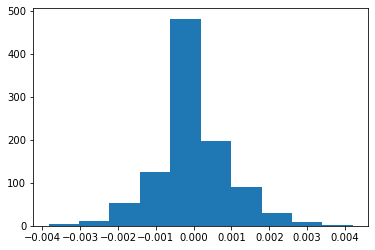

In [108]:
plt.hist(bootstrap_slopes)
plt.show()

In [110]:
slope_average = bootstrap_slopes.mean()
slope_average

4.75355871768854e-06

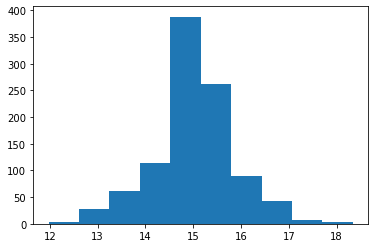

In [109]:
plt.hist(bootstrap_intercepts)
plt.show()

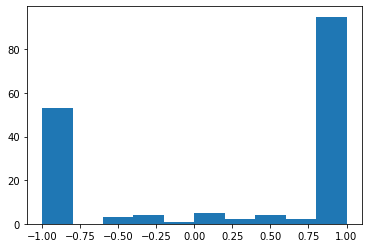

In [116]:
plt.hist(bootstrap_corr)
plt.show()

In [117]:
bootstrap_corr.max()

nan